In [1]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import prolif as plf
import MDAnalysis as mda
import pandas as pd
import src.analysis_functions as analysis_functions
import seaborn as sns
from typing import Optional
import src.simulation_metadata as sims

In [15]:
sim_list = [sims.PfHT_MMV12, sims.PfHT_MMV8, sims.W412A_MMV12, sims.GLUT1_MMV12]
sim_list = [sims.PfHT_MMV_crystal, sims.PfHT_MMV12]
color_l = [sim.color for sim in sim_list]

all_unis, all_lens = analysis_functions.load_unis(
    sim_list= sim_list
)


In [16]:
all_fp_dfs = {}
skip = 1

for sim in sim_list:
    temp_fp_dfs = []
    for n, rep_fp in enumerate(all_unis[sim.name]):
        df = analysis_functions.get_fp_dataframe(
            u=rep_fp,
            skip=skip,
            run_calc=False,
            filename=f"{sim.name}.replica_{n+1}.skip{skip}",
        )
        temp_fp_dfs.append(df)
    all_fp_dfs[sim.name] = temp_fp_dfs


In [35]:
df_l = []
for sim in sim_list:
    print(sim)
    df_l.extend(all_fp_dfs[sim.name])

SimulationMetadata(name='PfHT_MMV_crystal', path='/data/PfHT_MMV/crystal_structure_sims/MMV_sims', n_replicas=3, color='green')
SimulationMetadata(name='PfHT_MMV12', path='/data/PfHT_MMV/EM_MMV/MMV12', n_replicas=3, color='#539C44')


In [49]:
resname = 'SER432'
df_names = ['c rep1','c rep2','c rep3', 'em rep1','em rep2','em rep3']
df, locations_dict = analysis_functions.res_intxn_over_time_plf(
    df_l=df_l,
    df_names=df_names,
    resname=resname
)
locations= np.array(df['interaction_loc'])
jitter= np.array(df['original_df_name_loc'])/20
locations= locations+jitter

df['Frame'][df['value']==False] = np.nan


/tmp/ipykernel_182160/3940423875.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frame'][df['value']==False] = np.nan


Text(0, 0.5, 'Interactions with SER432')

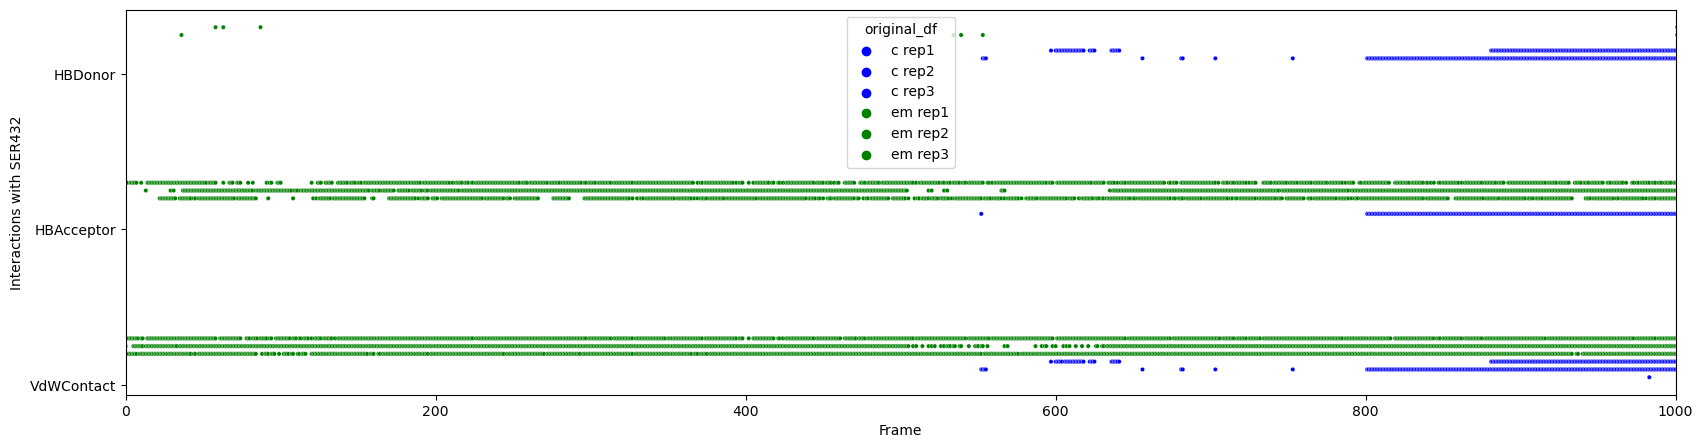

In [50]:
f,ax = plt.subplots(1,1, figsize=(20,5))
sns.scatterplot(data=df, 
                x='Frame', 
                y= locations, 
                s=10, 
                hue='original_df',
                ax=ax,
                palette=['b','b','b','g','g','g']
                
)

locs=[]
labels=[]
for key,value in locations_dict.items():
    locs.append(value)
    labels.append(key)
ax.set_yticks(locs,labels)
ax.set_xlim(0,1000)
ax.set_ylabel(f'Interactions with {resname}')


In [34]:
len(df_l)

12